This is a project for XXXX. It has been conducted using XXX data set, and the code is based on a tutorial by XXX.

In [1]:
# Import Python libraries necessary for data analysis 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

# Importing matplotlib.pyplot as plt for typing convenience, setting the style to ggplot, 
# %matplot inline to display graphs in notebook, and setting figure size

import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

# read in csv file, save as variable df, show first five lines of data frame

df = pd.read_csv("movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [2]:
# show basic info of data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [3]:
# Check for missing data

print("Missing values in each column:")

for i in df.columns:
    
    missing_sum = df[i].isnull().sum()

    print("{}: {}".format(i,missing_sum))

Missing values in each column:
name: 0
rating: 77
genre: 0
year: 0
released: 2
score: 3
votes: 3
director: 0
writer: 3
star: 1
country: 3
budget: 2171
gross: 189
company: 17
runtime: 4


In [4]:
# remove rows with missing data in the budget and gross columns

df = df.dropna(subset = ["budget","gross"])

# check to see if the code has worked

print(df["budget"].isnull().any())
print(df["gross"].isnull().any())

False
False


In [5]:
# sort values by gross revenue

df.sort_values(by = ["gross"], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0


Text(0, 0.5, 'Gross Revenue')

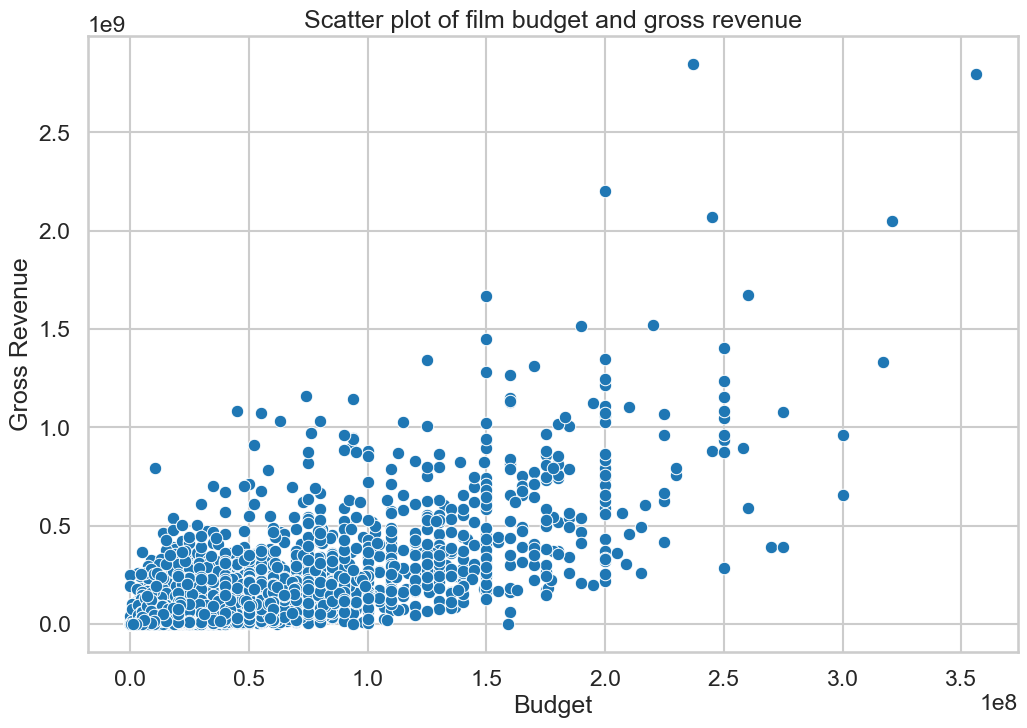

In [6]:
# scatter plot comparing budget and gross revenue

_ = sns.scatterplot(data = df, x = "budget", y = "gross")

# set axis and title

plt.title("Scatter plot of film budget and gross revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")

Text(0, 0.5, 'Gross Revenue')

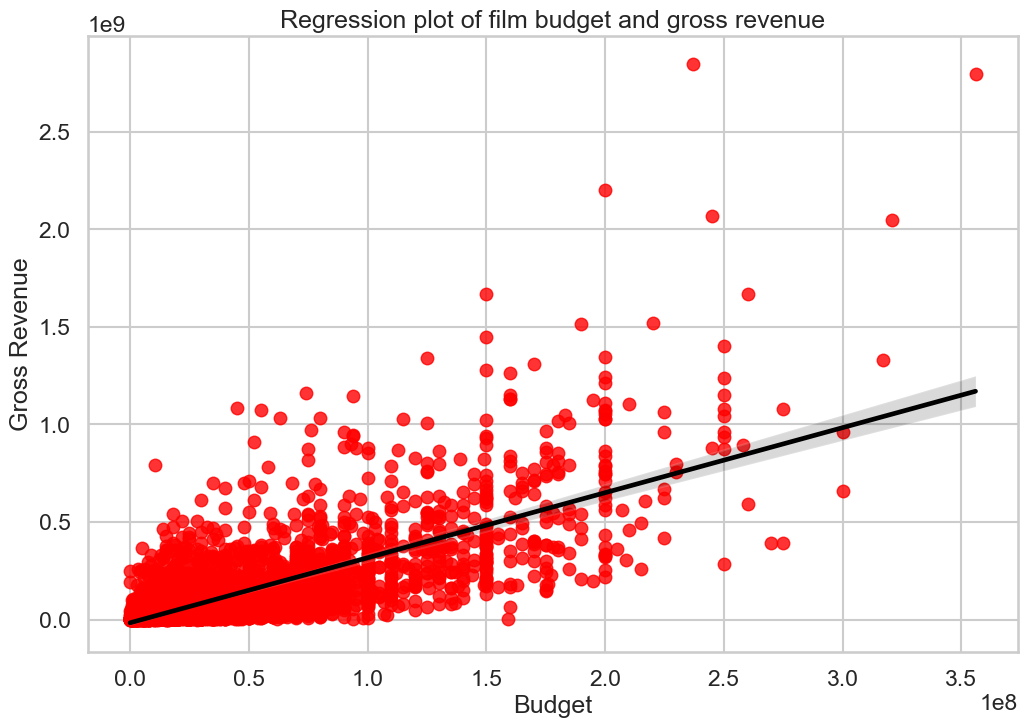

In [7]:
# regression plot comparing budget and gross revenue

_ = sns.regplot(data = df, x = "budget", y = "gross", scatter_kws = {"color": "red"}, line_kws = {"color":"black"}) 

# set axis and title

plt.title("Regression plot of film budget and gross revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")

In [8]:
# calculating the correlation between budget and gross revenue across entire data set

correlation = df[["budget","gross"]].corr() 

print(correlation)

          budget     gross
budget  1.000000  0.740395
gross   0.740395  1.000000


<AxesSubplot:xlabel='year', ylabel='Count'>

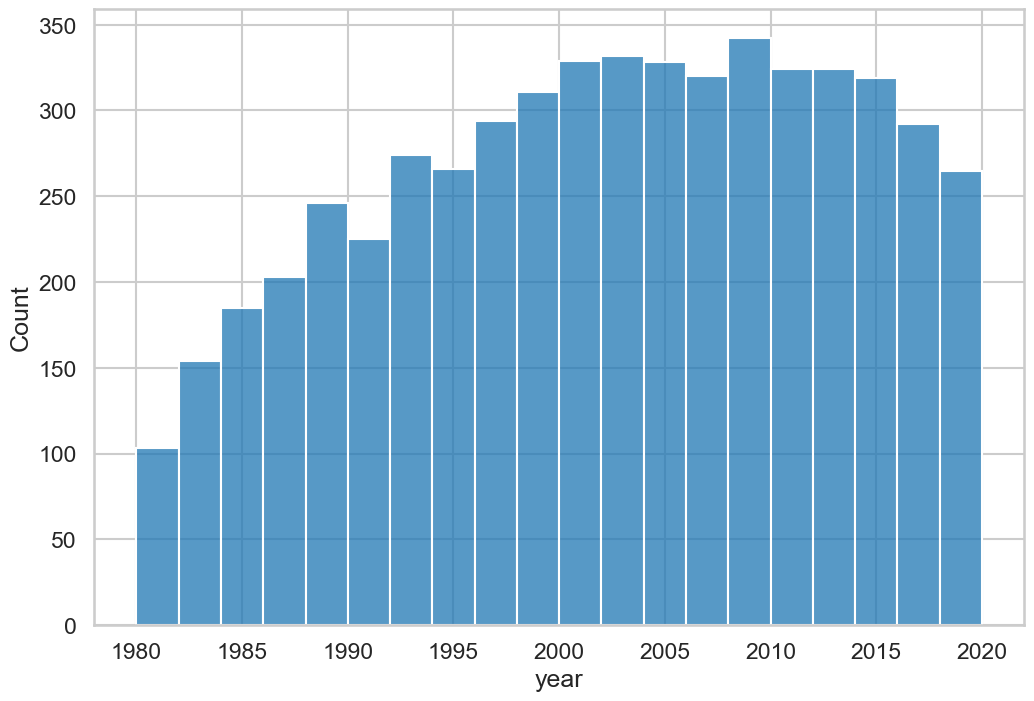

In [11]:
# I now want to see how the budgets and gross revenues for films have changed over time.
# I will first check the number of films in each year to see if the sample is big enough

sns.histplot(data = df, x = "year")

<AxesSubplot:xlabel='gross', ylabel='Count'>

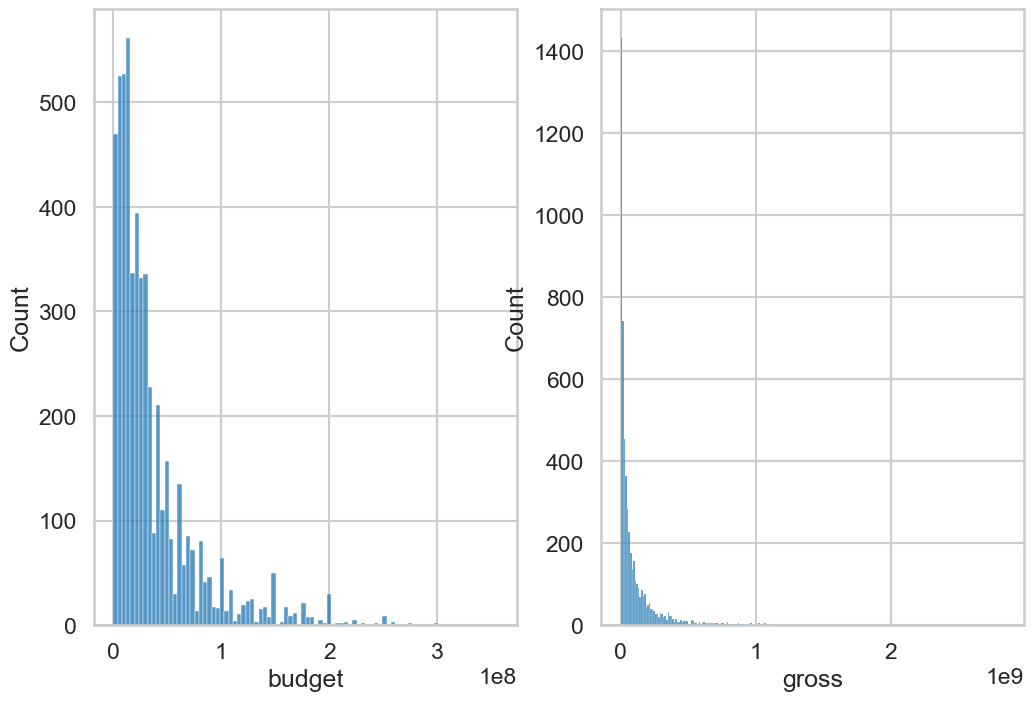

In [32]:
# apart from 1980 and 2020, seems like we have a reasonable sample size for each year
# to decide whether or not to use the mean or median, check distribution of budget and gross revenue

# remove 1980 and 2020 due to low sample size

df = df[(df["year"] != 1980) & (df["year"] != 2020)]

fig, ax = plt.subplots(1,2)
sns.histplot(data = df,  x = "budget", ax = ax[0])
sns.histplot(data = df,  x = "gross", ax = ax[1])

<AxesSubplot:xlabel='year', ylabel='Value'>

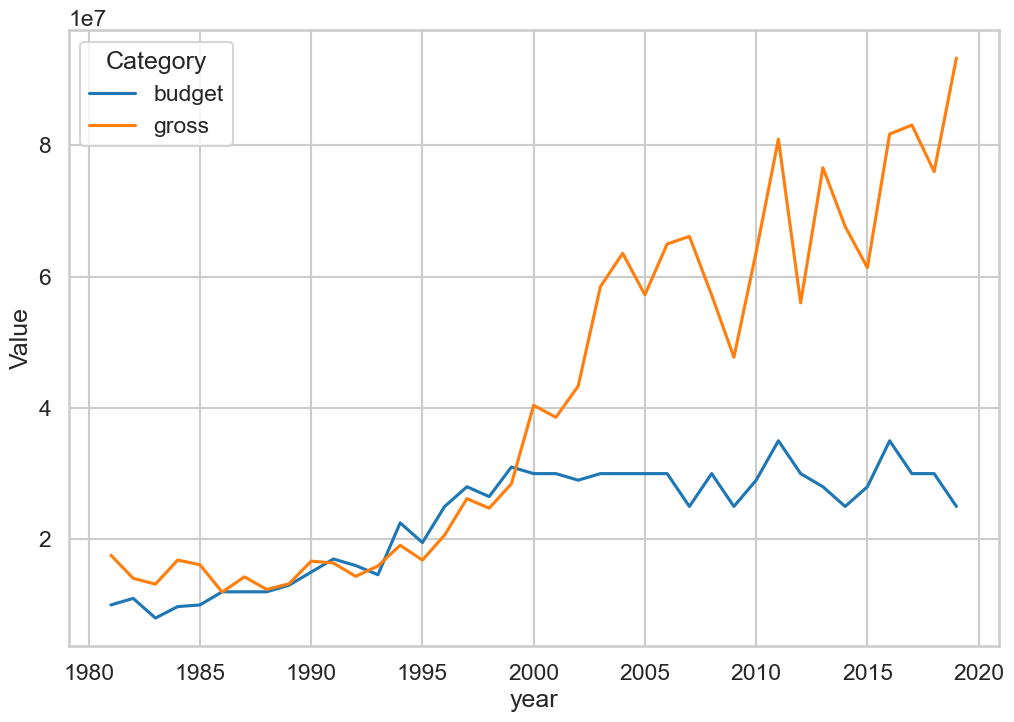

In [33]:
# can see in general the data is right skewed, which will affect the mean value. Will therefore compare medians
# take a subeset of the parameters of interest, groupby year and calculate the median

df_columns_of_interest = ["year", "budget", "gross"]
df_subset = df[df_columns_of_interest]
year_median = df_subset.groupby("year").median()
year_median = year_median.reset_index()

# Reshape the data using melt()
melted_df = pd.melt(year_median, id_vars="year", value_vars=["budget", "gross"], var_name="Category", value_name="Value")

# Create the line plot using seaborn
sns.lineplot(data=melted_df, x="year", y="Value", hue="Category")